# Regresión Lineal


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

%matplotlib inline 


## Métodos de Regresión Lineal.  Aplicado a un conjunto de datos de sklearn: The Boston Dataset

- Source: https://medium.com/qu4nt/el-machine-learning-y-la-regresión-python-c94db2968a4e


- Para ver la descripción del dataset ir a https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

The features can be summarized as follows:

- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per 10000
- PTRATIO: This is the pupil-teacher ratio by town
- B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent - by town
- LSTAT: This is the percentage lower status of the population
- MEDV: This is the median value of owner-occupied homes in $1000s

### a. Carga del dataset: Boston houses prices

In [2]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston.data.shape)  # 506 observaciones y 13 variables

# variables independientes
x = boston.data #data

# variable dependiente o resultado:
y = boston.target 

# nombres de variables 
features = boston.feature_names ; features

(506, 13)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### c. Preparar los dos conjuntos de datos: entrenamiento y prueba:

In [3]:

# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split as tts

# 80% de las observaciones quedan para el conjunto de entrenamiento y 20% para el conjunto de prueba:

x_ent, x_test, y_ent, y_test = tts(x, y, train_size=0.8, random_state=42, shuffle=True)

print(x_ent.shape, x_test.shape)

(404, 13) (102, 13)


In [4]:
# Método simple:
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn

lm = LinearRegression()
lm.fit(x_ent, y_ent)

LinearRegression()

In [5]:
# Coeficientes de la función de regresión:
print('a = ' + str(lm.intercept_) , 'y  B = ' + str(lm.coef_) )

# Utilizar el modelo para generar las predicciones:

y_predict = lm.predict(x_test) # valores predichos


a = 30.246750993923925 y  B = [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


In [6]:
# Verificar el R^2 (sobre el conjunto de test):

lm.score(x_test, y_test )  # con 1 aprendió muy bien.

0.6687594935356307

In [7]:
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 24.291119474973616
Raíz del Error Cuadrático Medio (RMSE) = 4.9286021826653466


# Aplicación de Mínimos cuadrados ordinarios (OLS)


Ver https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

In [9]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

x_ent, x_test, y_ent, y_test = tts(x, y, train_size=0.8, random_state=42, shuffle=True)


ols = sm.OLS(y_ent, x_ent)
res_ols = ols.fit()
print(res_ols.summary())

print('Parameters: ', res_ols.params)
print('R2: ', res_ols.rsquared)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              755.7
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                   1.13e-267
Time:                        20:45:55   Log-Likelihood:                         -1208.5
No. Observations:                 404   AIC:                                      2443.
Df Residuals:                     391   BIC:                                      2495.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
# Evaluación con el set test:
# Utilizar el modelo para generar las predicciones:

y_predictOLS = res_ols.predict(x_test)


# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predictOLS)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print(40*'*')
print('R2: ', res_ols.rsquared)

Error Cuadrático Medio (MSE) = 29.04404335035876
Raíz del Error Cuadrático Medio (RMSE) = 5.389252578081562
****************************************
R2:  0.9617236309197847


# Mínimos cuadrados ponderados (WLS)

In [11]:
from scipy import stats
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)


nsample = len(x_ent)
w = np.ones(nsample)
w[nsample * 6//10:] = 3

mod_wls = sm.WLS(y_ent, x_ent, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            WLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              723.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                   4.54e-264
Time:                        20:46:03   Log-Likelihood:                         -1305.9
No. Observations:                 404   AIC:                                      2638.
Df Residuals:                     391   BIC:                                      2690.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
# Evaluación con el set test:
# Utilizar el modelo para generar las predicciones:

y_predictWLS = res_wls.predict(x_test)


# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predictWLS)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print(40*'*')
print('R2: ', res_wls.rsquared)

Error Cuadrático Medio (MSE) = 28.130418417633003
Raíz del Error Cuadrático Medio (RMSE) = 5.30381168761043
****************************************
R2:  0.9600612476300967


## Resumen de resultados:

<table>
    <tr>
        <td>Modelo</td><td>R^2</td><td>RMSE</td>
    </tr>
    <tr>
        <td>Lineal Múltiple</td><td>0.668</td><td>4.92</td>
    </tr>
    <tr>
        <td>OLS</td><td>0.96</td><td>5.39</td>
    </tr>
    <tr>
        <td>WLS</td><td>0.96</td><td>5.30</td>
    </tr>
</table>


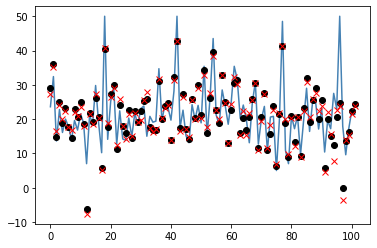

In [13]:
# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')
pd.Series(y_predictOLS.tolist()).plot(marker="x", linewidth=0, color='red')

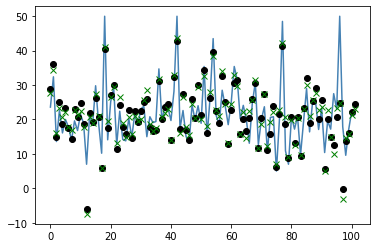

In [14]:
pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')
pd.Series(y_predictWLS.tolist()).plot(marker="x", linewidth=0, color='green')

In [15]:
# Presentar valor real, valor predicho 1 (LinearRegression), valor predicho 2 (modelo OLS), valor predicho 3 (modelo WLS)

y_values = pd.DataFrame([y_test, y_predict, y_predictOLS, y_predictWLS]).transpose()
y_values.columns = ['y_real','y_lm', 'y_ols', 'y_wls']
y_values.head()

,y_real,y_lm,y_ols,y_wls
0,23.6,28.996724,27.279682,27.754247
1,32.4,36.025565,35.125103,34.355004
2,13.6,14.816944,16.610909,15.955263
3,22.8,25.031979,24.015668,23.205845
4,16.1,18.769880,20.101311,20.762353


In [16]:
data_DF = pd.DataFrame(x, )
data_DF = pd.merge(data_DF, pd.DataFrame(y), right_index=True, left_index=True)


data_DF.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
data_DF.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


¿Cuál modelo predice mejor?

In [17]:
new_obs1 = [0.00632, 18, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]
new_obs2 = [0.0063, 17.8, 2.29, 0.1, 0.535, 6.56, 65.1, 4.07, 1.0, 294.0, 15.1, 395.9, 4.96]

print('Modelo de regresión mínimos cuadrados:')

print(lm.predict([new_obs1]))
print(lm.predict([new_obs2]))

print('\nModelo de regresión OLS:')
print(res_ols.predict(new_obs1))
print(res_wls.predict(new_obs1))

print('\nModelo de regresión WLS:')
print(res_ols.predict(new_obs2))
print(res_wls.predict(new_obs2))

Modelo de regresión mínimos cuadrados:
[29.95339638]
[30.44182998]

Modelo de regresión OLS:
[29.21037919]
[29.3206651]

Modelo de regresión WLS:
[29.51895981]
[29.48837523]


### e. Guardar el mejor modelo de forma persistente

Guardar de forma persistente el mejor modelo (considerar r^2, RMSE)

In [18]:
# Guardar el modelo de regresión original con las 13 variables independientes:

import joblib

joblib.dump(res_wls, "model_wls.pkl")

['model_wls.pkl']

In [19]:
# Utilizar el modelo entrenado que hemos guardado para predecir nuevas observaciones

model = joblib.load("model_wls.pkl")
model.predict(new_obs2)  # R^2 = 0.73

array([29.48837523])